<a href="https://colab.research.google.com/github/yuki198/hub/blob/master/gingerteller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving train.zip to train.zip
User uploaded file "train.zip" with length 31702912 bytes


In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving validation.zip to validation.zip
User uploaded file "validation.zip" with length 13071716 bytes


In [0]:
rm __MACOSX -r

In [42]:
!ls

sample_data  train.zip	validation.zip


In [0]:
!unzip -qq train.zip

In [0]:
!unzip -qq validation.zip

In [45]:
!ls

__MACOSX  sample_data  train  train.zip  validation  validation.zip


In [50]:
cd ..

/content


In [49]:
ls -1UR | wc -l

351


In [51]:
pwd

'/content'

In [52]:
ls -a

./   .config/   sample_data/  train.zip    validation.zip
../  __MACOSX/  train/        validation/


In [0]:
def compare_TV(hist):
        import matplotlib.pyplot as plt

        # Setting Parameters
        acc = hist.history['acc']
        val_acc = hist.history['val_acc']
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        epochs = range(len(acc))

        # 1) Accracy Plt
        plt.plot(epochs, acc, 'bo' ,label = 'training acc')
        plt.plot(epochs, val_acc, 'b' , label= 'validation acc')
        plt.title('Training and Validation acc')
        plt.legend()

        plt.figure()

        # 2) Loss Plt
        plt.plot(epochs, loss, 'bo' ,label = 'training loss')
        plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
        plt.title('Training and Validation loss')
        plt.legend()

        plt.show()

In [54]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

n_categories = 2
batch_size = 32
train_dir = 'train'
validation_dir = 'validation'
file_name = 'vgg16_sign_fine'

base_model = VGG16(weights = 'imagenet',include_top=False,
                 input_tensor = Input(shape=(224,224,3)))

#add new layers instead of FC networks
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation = 'relu')(x)
prediction = Dense(n_categories,activation = 'softmax')(x)
model = Model(inputs = base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer = SGD(lr=0.001, decay=1e-3, momentum=0.9),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Using TensorFlow backend.






58892288/58889256 [==============================] - 6s 0us/step








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________________________________

In [55]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

hist=model.fit_generator(train_generator,
                         epochs = 50,
                         verbose = 1,
                         validation_steps = 50,
                         validation_data = validation_generator,
                         steps_per_epoch = 50,
                         callbacks=[CSVLogger(file_name + '.csv')])

#save weights
model.save(file_name + '.h5')

Found 758 images belonging to 2 classes.
Found 344 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
50/50 [==============================] - 40s 805ms/step - loss: 0.6840 - acc: 0.5660 - val_loss: 0.6630 - val_acc: 0.6218
Epoch 2/50
50/50 [==============================] - 30s 605ms/step - loss: 0.6434 - acc: 0.6527 - val_loss: 0.6594 - val_acc: 0.5929
Epoch 3/50
50/50 [==============================] - 31s 616ms/step - loss: 0.5901 - acc: 0.6926 - val_loss: 0.5730 - val_acc: 0.6983
Epoch 4/50
50/50 [==============================] - 30s 604ms/step - loss: 0.5185 - acc: 0.7533 - val_loss: 0.5880 - val_acc: 0.6667
Epoch 5/50
50/50 [==============================] - 30s 606ms/step - loss: 0.4536 - acc: 0.8021 - val_loss: 0.5259 - val_acc: 0.7079
Epoch 6/50
50/50 [==============================] - 31s 624ms/step - loss: 0.4300 - acc: 0.7938 - val_loss: 0.4962 - val_acc: 0.7494
Epoch 7/50
50/50 [======

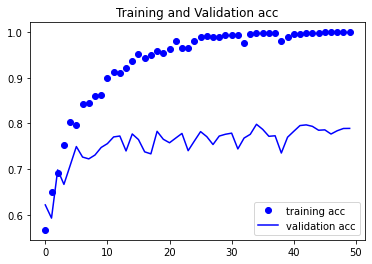

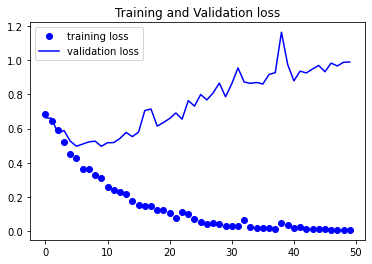

In [56]:
compare_TV(hist)